In [1]:
# Include this line to make plots interactive
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Import CSVs
top1000 = pd.read_csv('data_sets/Highest Holywood Grossing Movies.csv')
top5000 = pd.read_csv('data_sets/tmdb_5000_movies.csv')

top1000.head()
#top5000.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,16-Dec-15,936662225,1132859475,2069521700,"Action, Adventure, Sci-Fi",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,24-Apr-19,858373000,1939128328,2797501328,"Action, Adventure, Drama, Sci-Fi",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,16-Dec-09,760507625,2086738578,2847246203,"Action, Adventure, Fantasy, Sci-Fi",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"Action, Adventure, Sci-Fi",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"Action, Adventure, Sci-Fi",2 hr 29 min,NaN


In [3]:
#Clean up data. Rows to keep: Top1000: 'Title', 'Distributor', 'Domestic Sales (in $)', 'International Sales (in $)', 'Genre'
#Top 5000:'title', 'vote_average', 'revenue', 'release_date', 'budget'

top1000 = top1000[['Title', 'Distributor', 'Domestic Sales (in $)', 'International Sales (in $)', 'Genre']]
top5000 = top5000[['title', 'vote_average', 'release_date', 'revenue', 'budget']]

top1000.head()
#top5000.head()

,Title,Distributor,Domestic Sales (in $),International Sales (in $),Genre
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,936662225,1132859475,"Action, Adventure, Sci-Fi"
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,858373000,1939128328,"Action, Adventure, Drama, Sci-Fi"
2,Avatar (2009),Twentieth Century Fox,760507625,2086738578,"Action, Adventure, Fantasy, Sci-Fi"
3,Black Panther (2018),Walt Disney Studios Motion Pictures,700426566,647171407,"Action, Adventure, Sci-Fi"
4,Avengers: Infinity War (2018),Walt Disney Studios Motion Pictures,678815482,1369544272,"Action, Adventure, Sci-Fi"


In [4]:
#Clean up titles in Top1000 for easier merge

new_title = []

for x in top1000['Title']:
    
    old_title = x
    size = len(old_title)
    # Slice string to remove last 3 characters from
    Title = old_title[:size - 7]
    new_title.append(Title)
    #top1000.replace(to_replace= top1000['Title'], 
                     #value=Title 
                     #)
            
del top1000['Title']


            
top1000['title'] =  new_title


top1000.head()

,Distributor,Domestic Sales (in $),International Sales (in $),Genre,title
0,Walt Disney Studios Motion Pictures,936662225,1132859475,"Action, Adventure, Sci-Fi",Star Wars: Episode VII - The Force Awakens
1,Walt Disney Studios Motion Pictures,858373000,1939128328,"Action, Adventure, Drama, Sci-Fi",Avengers: Endgame
2,Twentieth Century Fox,760507625,2086738578,"Action, Adventure, Fantasy, Sci-Fi",Avatar
3,Walt Disney Studios Motion Pictures,700426566,647171407,"Action, Adventure, Sci-Fi",Black Panther
4,Walt Disney Studios Motion Pictures,678815482,1369544272,"Action, Adventure, Sci-Fi",Avengers: Infinity War


In [5]:
#merge the two datasets

final_movie_dataset = top1000.merge(top5000, how='left', on='title')

final_movie_dataset = final_movie_dataset.dropna(how='any',axis=0) 

final_movie_dataset.head()

#final_movie_dataset['release_date'].max()

,Distributor,Domestic Sales (in $),International Sales (in $),Genre,title,vote_average,release_date,revenue,budget
2,Twentieth Century Fox,760507625,2086738578,"Action, Adventure, Fantasy, Sci-Fi",Avatar,7.2,2009-12-10,2.787965e+09,237000000.0
6,Paramount Pictures,659363944,1542283320,"Drama, Romance",Titanic,7.5,1997-11-18,1.845034e+09,200000000.0
7,Universal Pictures,652385625,1018130819,"Action, Adventure, Sci-Fi",Jurassic World,6.5,2015-06-09,1.513529e+09,150000000.0
8,Walt Disney Studios Motion Pictures,623357910,895457605,"Action, Adventure, Sci-Fi",The Avengers,7.4,2012-04-25,1.519558e+09,220000000.0
11,Walt Disney Studios Motion Pictures,543638043,1119261396,"Adventure, Animation, Drama, Family, Musical",The Lion King,8.0,1994-06-23,7.882418e+08,45000000.0


In [6]:
#Update revenue

for row in final_movie_dataset:
    new_rev = (final_movie_dataset['Domestic Sales (in $)']+ final_movie_dataset['International Sales (in $)'])

    
    
del final_movie_dataset['revenue']


            
final_movie_dataset['Revenue'] =  new_rev

final_movie_dataset.head()    


,Distributor,Domestic Sales (in $),International Sales (in $),Genre,title,vote_average,release_date,budget,Revenue
2,Twentieth Century Fox,760507625,2086738578,"Action, Adventure, Fantasy, Sci-Fi",Avatar,7.2,2009-12-10,237000000.0,2847246203
6,Paramount Pictures,659363944,1542283320,"Drama, Romance",Titanic,7.5,1997-11-18,200000000.0,2201647264
7,Universal Pictures,652385625,1018130819,"Action, Adventure, Sci-Fi",Jurassic World,6.5,2015-06-09,150000000.0,1670516444
8,Walt Disney Studios Motion Pictures,623357910,895457605,"Action, Adventure, Sci-Fi",The Avengers,7.4,2012-04-25,220000000.0,1518815515
11,Walt Disney Studios Motion Pictures,543638043,1119261396,"Adventure, Animation, Drama, Family, Musical",The Lion King,8.0,1994-06-23,45000000.0,1662899439


In [7]:
#Create profit column

for row in final_movie_dataset:
    value = (final_movie_dataset['Revenue']- final_movie_dataset['budget'])
  


final_movie_dataset['Profit/Loss']= value

final_movie_dataset.head()

,Distributor,Domestic Sales (in $),International Sales (in $),Genre,title,vote_average,release_date,budget,Revenue,Profit/Loss
2,Twentieth Century Fox,760507625,2086738578,"Action, Adventure, Fantasy, Sci-Fi",Avatar,7.2,2009-12-10,237000000.0,2847246203,2.610246e+09
6,Paramount Pictures,659363944,1542283320,"Drama, Romance",Titanic,7.5,1997-11-18,200000000.0,2201647264,2.001647e+09
7,Universal Pictures,652385625,1018130819,"Action, Adventure, Sci-Fi",Jurassic World,6.5,2015-06-09,150000000.0,1670516444,1.520516e+09
8,Walt Disney Studios Motion Pictures,623357910,895457605,"Action, Adventure, Sci-Fi",The Avengers,7.4,2012-04-25,220000000.0,1518815515,1.298816e+09
11,Walt Disney Studios Motion Pictures,543638043,1119261396,"Adventure, Animation, Drama, Family, Musical",The Lion King,8.0,1994-06-23,45000000.0,1662899439,1.617899e+09


In [8]:
#Calculate domestic and international sales distributions


for row in final_movie_dataset:
    dom_rate = ((final_movie_dataset['Domestic Sales (in $)']/final_movie_dataset['Revenue'])*100).map("{:.2f}%".format)
    
final_movie_dataset['Domestic Sales (as % of total Revenue)'] = dom_rate

for row in final_movie_dataset:
    int_rate = ((final_movie_dataset['International Sales (in $)']/final_movie_dataset['Revenue'])*100).map("{:.2f}%".format)
    
final_movie_dataset['International Sales (as % of total Revenue)'] = int_rate

#Organize columns into more logical order

final_movie_dataset = final_movie_dataset[['title',
                                           'Distributor',
                                           'Genre',
                                           'release_date',
                                           'budget',
                                           'Domestic Sales (in $)',
                                           'International Sales (in $)',
                                           'Domestic Sales (as % of total Revenue)',
                                           'International Sales (as % of total Revenue)',
                                           'Revenue',
                                           'Profit/Loss',
                                           'vote_average'
                                          ]]


final_movie_dataset.head(20)
    


,title,Distributor,Genre,release_date,budget,Domestic Sales (in $),International Sales (in $),Domestic Sales (as % of total Revenue),International Sales (as % of total Revenue),Revenue,Profit/Loss,vote_average
2,Avatar,Twentieth Century Fox,"Action, Adventure, Fantasy, Sci-Fi",2009-12-10,237000000.0,760507625,2086738578,26.71%,73.29%,2847246203,2.610246e+09,7.2
6,Titanic,Paramount Pictures,"Drama, Romance",1997-11-18,200000000.0,659363944,1542283320,29.95%,70.05%,2201647264,2.001647e+09,7.5
7,Jurassic World,Universal Pictures,"Action, Adventure, Sci-Fi",2015-06-09,150000000.0,652385625,1018130819,39.05%,60.95%,1670516444,1.520516e+09,6.5
8,The Avengers,Walt Disney Studios Motion Pictures,"Action, Adventure, Sci-Fi",2012-04-25,220000000.0,623357910,895457605,41.04%,58.96%,1518815515,1.298816e+09,7.4
11,The Lion King,Walt Disney Studios Motion Pictures,"Adventure, Animation, Drama, Family, Musical",1994-06-23,45000000.0,543638043,1119261396,32.69%,67.31%,1662899439,1.617899e+09,8.0
12,The Dark Knight,Warner Bros.,"Action, Crime, Drama, Thriller",2008-07-16,185000000.0,534858444,471115201,53.17%,46.83%,1005973645,8.209736e+08,8.2
18,Star Wars: Episode I - The Phantom Menace,Twentieth Century Fox,"Action, Adventure, Fantasy, Sci-Fi",1999-05-19,115000000.0,474544677,552538030,46.20%,53.80%,1027082707,9.120827e+08,6.3
20,Avengers: Age of Ultron,Walt Disney Studios Motion Pictures,"Action, Adventure, Sci-Fi",2015-04-22,280000000.0,459005868,943803672,32.72%,67.28%,1402809540,1.122810e+09,7.3
21,The Dark Knight Rises,Warner Bros.,"Action, Crime, Drama",2012-07-16,250000000.0,448139099,633003513,41.45%,58.55%,1081142612,8.311426e+08,7.6
22,Shrek 2,DreamWorks Distribution,"Adventure, Animation, Comedy, Family, Fantasy,...",2004-05-19,150000000.0,441226247,487534523,47.51%,52.49%,928760770,7.787608e+08,6.7


In [9]:
list1 = final_movie_dataset['Genre'].tolist()

unique_list = []


for entry in list1:
    #Split the string into a list
    genres_from_entry = entry.split(", ")

    #For loop to add genre to unique_list if not alredy in unique_list
    for genre in genres_from_entry:
        if genre not in unique_list:
            unique_list.append(genre)



In [10]:
#output of unique_list
unique_list

['Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'Drama',
 'Romance',
 'Animation',
 'Family',
 'Musical',
 'Crime',
 'Thriller',
 'Comedy',
 'Biography',
 'War',
 'Mystery',
 'Sport',
 'Horror',
 'Music',
 'History',
 'Western',
 'Documentary']

In [11]:
# Create empty dictionary to hold genre info
genre_dict = {}

In [12]:
###Add each unique genre to the dictionary with###

#Loop through unique_list
for entry in unique_list:

    ##Create dictionary entry to genre
    genre_dict.update(
        {
            #Make key for each genre based on genre name + '_dict_key'
            entry.lower() + '_dict_key': 
            {
                #Create Key-Value pairs
                "genre" : entry,
                "genre_total_title_count" : 0,
                "genre_total_budget" : 0,
                "genre_total_revenue" : 0,
                "genre_domestic_sales" : 0,
                "genre_international_sales" : 0,
                "sum_vote_average" : 0,
                "movie_title_list" : []
            
            
            
            
            
            }
        }



    ) 

In [13]:
# for loop to index through each row of the dataframe
for index, row in final_movie_dataset.iterrows():
    #row by row within for loop, creates a list of lowercase genres for each 
    genre_list_by_movie = row['Genre'].lower().split(", ")
    
    # For Loop to go through each element of the genre_list_by_movie
    for genre in genre_list_by_movie:

        #sets variable that will be used to access correct dictionary item by key
        genre_dict_key = genre + '_dict_key'
        
        #Set the dictionary values for the corresponding elements
        genre_dict[genre_dict_key]['genre_total_title_count'] = genre_dict[genre_dict_key]['genre_total_title_count'] + 1
        genre_dict[genre_dict_key]['genre_total_budget'] = genre_dict[genre_dict_key]['genre_total_budget'] + row['budget']
        genre_dict[genre_dict_key]['genre_total_revenue'] = genre_dict[genre_dict_key]['genre_total_revenue'] + row['Revenue']
        genre_dict[genre_dict_key]['genre_domestic_sales'] = genre_dict[genre_dict_key]['genre_domestic_sales'] + row['Domestic Sales (in $)']
        genre_dict[genre_dict_key]['genre_international_sales'] = genre_dict[genre_dict_key]['genre_international_sales'] + row['International Sales (in $)']
        genre_dict[genre_dict_key]['sum_vote_average'] = genre_dict[genre_dict_key]['sum_vote_average'] + row['vote_average']
        genre_dict[genre_dict_key]['movie_title_list'].append(row['title'])
        
        
    


In [14]:
#Make new dataframe from genre_dict
genre_df = pd.DataFrame.from_dict(genre_dict,orient='index')


#reset so index is numeric
genre_df.reset_index(drop=True,inplace=True)

In [15]:
#Output of genre_df
genre_df

,genre,genre_total_title_count,genre_total_budget,genre_total_revenue,genre_domestic_sales,genre_international_sales,sum_vote_average,movie_title_list
0,Action,300,3.377368e+10,131813301506,53560793805,78252507701,1938.7,"[Avatar, Jurassic World, The Avengers, The Dar..."
1,Adventure,316,3.700137e+10,159520075328,61956135804,97563939524,2050.9,"[Avatar, Jurassic World, The Avengers, The Lio..."
2,Fantasy,154,1.744549e+10,73400721969,28947837246,44452884723,982.7,"[Avatar, Star Wars: Episode I - The Phantom Me..."
3,Sci-Fi,160,1.966200e+10,78830235034,31693650614,47136584420,1037.7,"[Avatar, Jurassic World, The Avengers, Star Wa..."
4,Drama,230,1.542450e+10,76009228534,34665514684,41343713850,1581.4,"[Titanic, The Lion King, The Dark Knight, The ..."
5,Romance,120,7.227488e+09,39192702764,17816203438,21376499326,763.5,"[Titanic, Shrek 2, Aladdin, Forrest Gump, Shre..."
6,Animation,102,1.092699e+10,48612985382,18784611980,29828373402,670.1,"[The Lion King, Shrek 2, The Lion King, Toy St..."
7,Family,169,1.625749e+10,71815155881,29288660969,42526494912,1076.4,"[The Lion King, Shrek 2, E.T. the Extra-Terres..."
8,Musical,33,2.364488e+09,14841841976,5893551024,8948290952,216.2,"[The Lion King, The Lion King, Frozen, Aladdin..."
9,Crime,105,6.780300e+09,29080452307,14328299490,14752152817,692.6,"[The Dark Knight, The Dark Knight Rises, Despi..."


In [16]:
# unique_list = []
     
# traverse for all elements

# genre_list = (final_movie_dataset['Genre'].str.split(',')) 

# for index, row in final_movie_dataset.iteritems():
#     print(index, row)
#     for genre in row['Genre']:
#         if genre not in unique_list:
#             unique_list.append(genre)
            
# df_out = final_movie_dataset['Genre'].str.split(',', )

# df_out
   
list1 = final_movie_dataset['Genre'].tolist()
list1

# for genre in list1:
#     if genre not in unique_list:
#         unique_list.append(genre) 


    
        
# # print list
# print(unique_list)


['Action, Adventure, Fantasy, Sci-Fi',
 'Drama, Romance',
 'Action, Adventure, Sci-Fi',
 'Action, Adventure, Sci-Fi',
 'Adventure, Animation, Drama, Family, Musical',
 'Action, Crime, Drama, Thriller',
 'Action, Adventure, Fantasy, Sci-Fi',
 'Action, Adventure, Sci-Fi',
 'Action, Crime, Drama',
 'Adventure, Animation, Comedy, Family, Fantasy, Romance',
 'Adventure, Family, Sci-Fi',
 'Action, Adventure, Drama, Sci-Fi, Thriller',
 'Action, Adventure, Fantasy',
 'Adventure, Animation, Drama, Family, Musical',
 'Adventure, Animation, Comedy, Family, Fantasy',
 'Action, Adventure, Sci-Fi',
 'Action, Adventure, Sci-Fi',
 'Action, Adventure, Sci-Fi, Thriller',
 'Action, Adventure, Sci-Fi',
 'Action, Adventure, Sci-Fi, Thriller',
 'Action, Adventure, Sci-Fi',
 'Adventure, Animation, Comedy, Family, Fantasy, Musical',
 'Adventure, Animation, Comedy, Family',
 'Action, Adventure, Fantasy, Sci-Fi',
 'Action, Adventure, Drama, Fantasy',
 'Action, Adventure, Sci-Fi',
 'Drama',
 'Adventure, Animatio

In [17]:
import datetime as dt
#Create a new dataframe with release dates and total revenue

date_vs_rev = final_movie_dataset[['release_date', 'Revenue']]
date_vs_rev.head()













,release_date,Revenue
2,2009-12-10,2847246203
6,1997-11-18,2201647264
7,2015-06-09,1670516444
8,2012-04-25,1518815515
11,1994-06-23,1662899439


In [18]:
#Extract month only from release date to compare with revenue, replace the release date with the release month
#df['mm'] = pd.to_datetime(df['StartDate']).dt.month
# pd.to_datetime(df['OPEN TIME'],format= '%H:%M:%S' ).dt.time

date_vs_rev['release_date'] = pd.to_datetime(date_vs_rev['release_date'], format='%Y-%m-%d')
from pandas.tseries.offsets import DateOffset
date_vs_rev['release_month'] = date_vs_rev['release_date']+DateOffset(months = 10)
date_vs_rev['release_month'] = pd.to_datetime(date_vs_rev['release_month']).dt.month

date_vs_rev.head(30)

<ipython-input-18-61e865496b8b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_vs_rev['release_date'] = pd.to_datetime(date_vs_rev['release_date'], format='%Y-%m-%d')
<ipython-input-18-61e865496b8b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_vs_rev['release_month'] = date_vs_rev['release_date']+DateOffset(months = 10)
<ipython-input-18-61e865496b8b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,release_date,Revenue,release_month
2,2009-12-10,2847246203,10
6,1997-11-18,2201647264,9
7,2015-06-09,1670516444,4
8,2012-04-25,1518815515,2
11,1994-06-23,1662899439,4
12,2008-07-16,1005973645,5
18,1999-05-19,1027082707,3
20,2015-04-22,1402809540,2
21,2012-07-16,1081142612,5
22,2004-05-19,928760770,3


In [19]:
#Delete release date column
del date_vs_rev['release_date']
date_vs_rev.head()

,Revenue,release_month
2,2847246203,10
6,2201647264,9
7,1670516444,4
8,1518815515,2
11,1662899439,4


In [20]:
#Average revenue within a particular month(visualize bell curve)
monthly_avg_rev = date_vs_rev.groupby(['release_month']).Revenue.mean().to_frame()
monthly_avg_rev["month_name"] = ["March","April","May","June","July", "August","September", "October", "November", "December", "January","February"]

monthly_avg_rev

,Revenue,month_name
release_month,,
1,3.439684e+08,March
2,5.724768e+08,April
3,4.759342e+08,May
4,4.470075e+08,June
5,3.417067e+08,July
6,2.694835e+08,August
7,2.707764e+08,September
8,3.468867e+08,October
9,4.078017e+08,November


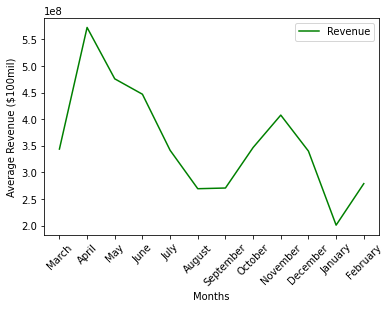

In [31]:
from matplotlib import pyplot as plt 
%matplotlib inline


#month = ["April","June", "August", "October",  "December", "February"]
ax=monthly_avg_rev.plot(color = "green")
ax.set_xlabel("Months")
ax.set_ylabel("Average Revenue ($100mil)")
ax.set_xticks(list(range(1, 13)))
ax.set_xticklabels(monthly_avg_rev.month_name, rotation=45)

#ax.set_xticks(x_label)
#plt.xticks(y_pos, bars, color='orange', rotation=45, fontweight='bold', fontsize='17', horizontalalignment='right')

plt.savefig("mcleanmonths.png", pad_inches=0.5, bbox_inches='tight')
#Average revenue within a particular season(visualize bar chart)



In [ ]:
#Create 4 bins for the season, 3 months each
#Bins are Mar-May(3), June-Aug(6), Sept-Nov(9), Dec-Feb(12)
bins = [0, 3, 6, 9, 12]
#Create names for the bins
season = ["Q1:Spring", "Q2:Summer", "Q3:Fall", "Q4:Winter"]

date_vs_rev["Season quarter"] = pd.cut(date_vs_rev["release_month"], bins, labels=season, include_lowest=True)
date_vs_rev

In [22]:
# date_vs_rev = date_vs_rev.groupby("Season quarter")
# date_vs_rev.max()

#This will bin on a line graph
q_rev = date_vs_rev.groupby('Season quarter').mean("Revenue")
#date_vs_rev.groupby('Season quarter').sum("Revenue").plot(color = 'green')
q_rev=q_rev.drop(columns = ["release_month"])
q_rev

# plt.bar(bins=4, color = 'green')

# ax = date_vs_rev.plot(bins=4, kind='hist', rwidth=0.7, color='green')
# ax.set(xlabel="season")
# plt.show()

# ax = plt.hist(season, bins = bins)
# plt.xticks(rotation = 90)
# x = ['Q1:Spring', 'Q2:Summer', 'Q3:Fall', 'Q4:Winter']
# y = ['1025468216', '1670516444', '1081142612', '2847246203']
# plt.plot(x, y)
# plt.xlabel("Season quarter")
# plt.ylabel("Average Revenue")
# plt.show()

# plt.barh("Season quarter", "Revenue", data = Revenue, color = "green") 
# plt.xlabel("Season quarter") 
# plt.ylabel("Average Revenue") 

# plt.show()

#I was expecting the average rev to be highest in the summer

,Revenue
Season quarter,
Q1:Spring,4.547432e+08
Q2:Summer,3.761646e+08
Q3:Fall,3.617169e+08
Q4:Winter,3.164540e+08


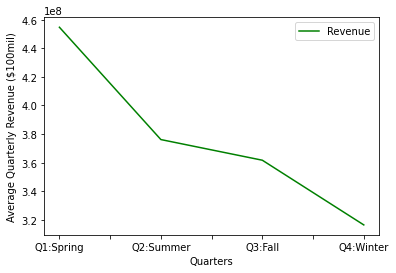

In [23]:
ax=q_rev.plot(color='green')

ax.set_xlabel("Quarters")
ax.set_ylabel("Average Quarterly Revenue ($100mil)")
plt.savefig("mcleanquarters.png", pad_inches=0.5, bbox_inches='tight')